In [22]:
from keras.datasets import mnist
import keras as K
from keras.layers import Flatten,Dense,Dropout

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


In [26]:
X_train = X_train/255
X_test  = X_test/255

2


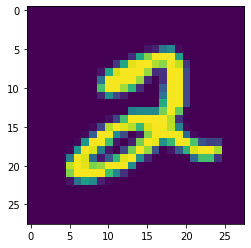

In [15]:
import matplotlib.pyplot as pl
%matplotlib inline

plt.imshow(X_train[5,:,:])
print(y_train[5])


In [27]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [28]:
print(y_train[5])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
model = K.Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
acc = model.evaluate(X_test,y_test,verbose=1)
print(acc[1]*100)

10000/10000 [==============================] - 1s 100us/step
8.980000019073486


In [39]:
from keras.callbacks import ModelCheckpoint


In [116]:
chkp = ModelCheckpoint("mnist.models.best.hdf5",verbose=1,save_best_only=True)
model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,callbacks=[chkp],validation_split=0.2,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 329us/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0955 - val_accuracy: 0.9800

Epoch 00001: val_loss improved from inf to 0.09552, saving model to mnist.models.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 13s 278us/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.1047 - val_accuracy: 0.9768

Epoch 00002: val_loss did not improve from 0.09552
Epoch 3/10
48000/48000 [==============================] - 15s 322us/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0928 - val_accuracy: 0.9799

Epoch 00003: val_loss improved from 0.09552 to 0.09278, saving model to mnist.models.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 15s 313us/step - loss: 0.0210 - accuracy: 0.9926 - val_loss: 0.0867 - val_accuracy: 0.9827

Epoch 00004: val_loss improved from 0.09278 to 0.08672, saving model to mnist.models.best.hdf5
Epoch 5/10
48000/4

In [117]:
acc = model.evaluate(X_test,y_test,verbose=1)
print(acc[1]*100)

10000/10000 [==============================] - 1s 92us/step
98.36999773979187


1/1 [==============================] - 0s 13ms/step
9


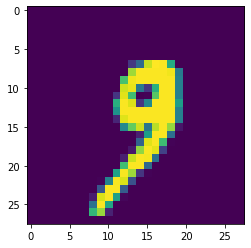

In [120]:
import numpy as np
pred = model.predict(X_test[1000:1001,:,:],verbose=1) #1001 is exclusive,this is done because predict only
#accepts a batch of examples.But in this case we want to check only one image
plt.imshow(X_test[1000,:,:])
print(np.argmax(pred))